## Name: Telco Customer Churn

Rows: 7,043 customers

Columns: 21

Problem Type: Binary Classification

Target Variable: Churn

**Goal: Predict whether a customer will leave the telecom company (Yes/No)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

#### Check the first five rows

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Customer Demographic Features
* customerID - Unique identifier for each customer,Used only for identification,Dropped before modeling.
* gender - Gender of the customer, Values: Male, Female, Type: Categorical
* SeniorCitizen - Indicates if the customer is a senior citizen, Values: 1 = Yes, 0 = No ,Type: Binary Numerical
* Partner - Whether the customer has a partner , Values: Yes, No ,Type: Categorical
* Dependents - Whether the customer has dependents , Values: Yes, No , Type: Categorical


## Service Usage Features

* PhoneService - Whether the customer has phone service , Values: Yes, No
* MultipleLines - Whether the customer has multiple phone lines , Values: Yes, No, No phone service
* InternetService - Type of internet service used , Values: DSL, Fiber optic, No , Fiber optic users tend to churn more.
* OnlineSecurity - Whether online security service is enabled. - Values: Yes, No, No internet service
* OnlineBackup - Whether online backup service is enabled , Values: Yes, No, No internet service
* DeviceProtection - Whether device protection service is enabled , Values: Yes, No, No internet service
* TechSupport - Whether technical support service is enabled , Values: Yes, No, No internet service
* StreamingTV - Whether streaming TV service is used , Values: Yes, No, No internet service
* StreamingMovies - Whether streaming movies service is used , Values: Yes, No, No internet service


## Contract & Billing Features

* Contract - Contract duration of the customer , Values: Month-to-month, One year, Two year ,Month-to-month contracts have the highest churn rate.
* PaperlessBilling - Whether the customer uses paperless billing , Values: Yes, No
* PaymentMethod - Payment method used by the customer , Values: Electronic check , Mailed check ,Bank transfer (automatic),
Credit card (automatic)


## Financial Features

* MonthlyCharges - Monthly amount charged to the customer , Type: Numerical , Higher charges correlate with higher churn.
* TotalCharges - Total amount charged over the customer’s tenure , Type: Numerical , Requires data cleaning (converted from string to numeric).

## Other Features

* tenure - represents the number of months a customer has stayed with the telecom company.

In [12]:
## shape of the dataset
df.shape

(7043, 21)

### 1. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [13]:
## check the missign values 

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### conclusion- There are no any missing values 

In [14]:
df.duplicated().sum()

np.int64(0)

#### conclusion- There are no any duplicate values

In [15]:
## check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### conclusion- There are SeniorCitizen ,tenure,  MonthlyCharges -> numeric type others are categorical

In [16]:
## check the number of the unique values in the each feature and the check the values

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### insights -> identify wrong datatype TotalCharges.It should be numerical datatype        

In [17]:
## identify the blank like values
df[df['TotalCharges']== " "].shape

(11, 21)

In [18]:
## convert string type values to the integer type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [19]:
## check the null values exists in TotalCharges
df['TotalCharges'].isnull().sum()

np.int64(11)

* ## Conclusion -> Identify after the convert string type to numeric some null values in TotalCharges

#### remove those null values

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### *  identify mean and the median huge gap conclusion-> some outliers can be inside TotalCharges 

In [21]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)
df['TotalCharges'].isnull().sum() # There are no any null values inside the Total_Charges feature

np.int64(0)

In [22]:
print('gender :' ,end=" ")
print(df['gender'].unique())

print('SeniorCitizen :' ,end=" ")
print(df['SeniorCitizen'].unique())

print('Partner :' ,end=" ")
print(df['Partner'].unique())

print('Dependents :' ,end=" ")
print(df['Dependents'].unique())

print('PhoneService :' ,end=" ")
print(df['PhoneService'].unique())

print('MultipleLines :' ,end=" ")
print(df['MultipleLines'].unique())

print('InternetService :' ,end=" ")
print(df['InternetService'].unique())


print('OnlineSecurity :' ,end=" ")
print(df['OnlineSecurity'].unique())


print('OnlineBackup :' ,end=" ")
print(df['OnlineBackup'].unique())


print('DeviceProtection :' ,end=" ")
print(df['DeviceProtection'].unique())


print('TechSupport :' ,end=" ")
print(df['TechSupport'].unique())


print('StreamingTV :' ,end=" ")
print(df['StreamingTV'].unique())



print('StreamingMovies :' ,end=" ")
print(df['StreamingMovies'].unique())


print('Contract :' ,end=" ")
print(df['Contract'].unique())

print('PaperlessBilling  :' ,end=" ")
print(df['PaperlessBilling'].unique())


print('PaymentMethod  :' ,end=" ")
print(df['PaymentMethod'].unique())

print('Churn  :' ,end=" ")
print(df['Churn'].unique())






gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  : ['No' 'Yes']


In [23]:
## check the statistics of the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### 2. Spliit the categorical and numerical features

In [24]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [25]:
## print the length and name of the features for numerical_features and categorical_features

print("Length of the Numerical features: {} and features are {}".format(len(numerical_features),numerical_features))
print("Length of the Categorical features: {} and features are {}".format(len(categorical_features),categorical_features))


Length of the Numerical features: 4 and features are ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Length of the Categorical features: 17 and features are ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Exploring Data (Visualization)

#### 1. univarient analysis -> histrograms ,Violin, kde plots and blox plot

*  Focus: distribution, central tendency, spread, and outliers
    - Histogram- Distribution
    - Box plot- outliers and distribution
    - Kde plot- smooth distribution
    - Violin plot - Distribution and density
    - pie chart - Proportion   
    - Bar Chart - Frequency
    - Count plot - Category comparison 

## Target Variable Analysis

In [26]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

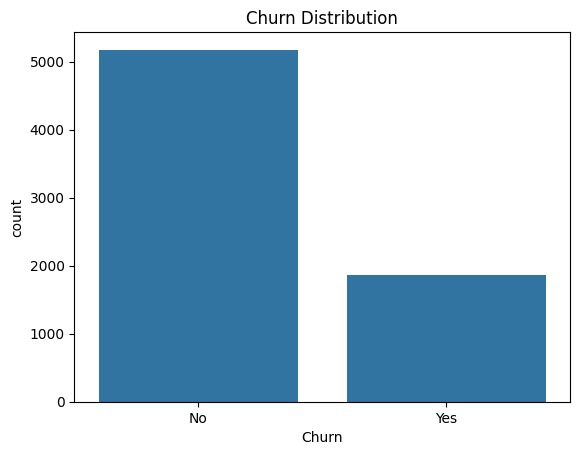

In [27]:
sns.countplot(x='Churn',data=df)
plt.title("Churn Distribution")
plt.show()

#### Insights

* Dataset is slightly imbalanced
* Identify the more customers are stayed than churned

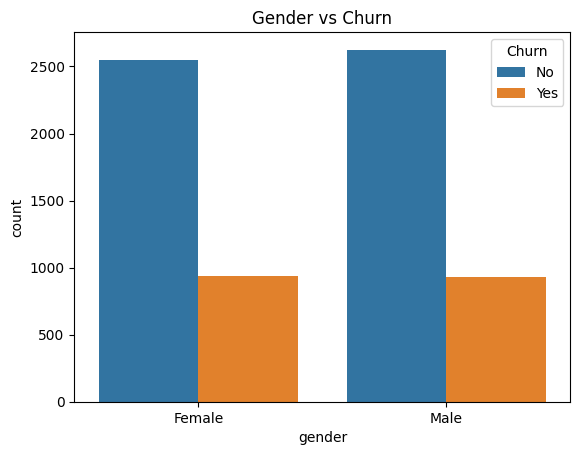

In [28]:
# gender vs Churn

sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Gender vs Churn")
plt.show()

#### Gender does not strongly influence churn.

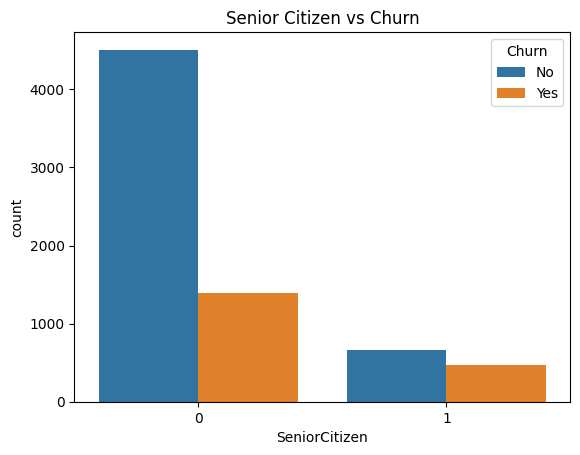

In [29]:
## Senior Citizen vs Churn

sns.countplot(x='SeniorCitizen',hue='Churn' ,data=df)
plt.title("Senior Citizen vs Churn")
plt.show()



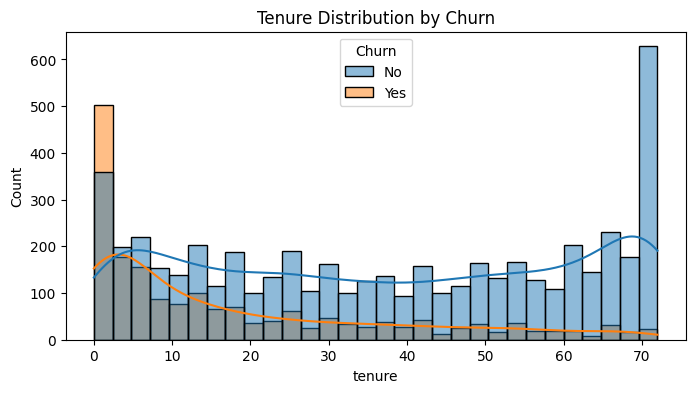

In [30]:
# Tenure Analysis

plt.figure(figsize=(8,4))
sns.histplot(data=df,x='tenure',hue='Churn',bins=30,kde=True)
plt.title("Tenure Distribution by Churn")
plt.show()

* Customers with short tenure churn more

* Long-term customers are more loyal

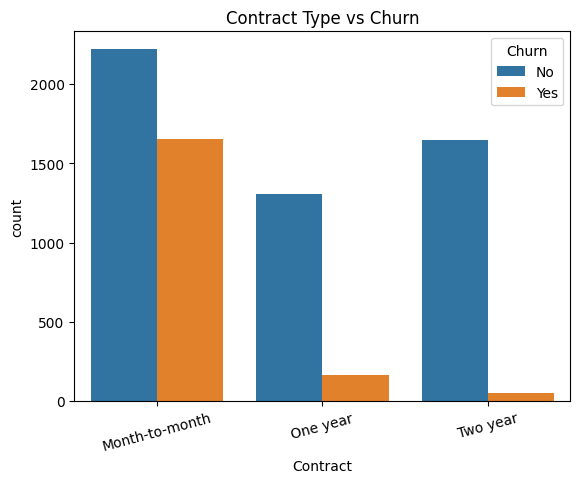

In [31]:
## Contract Type vs Churn

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()


#### Strong relationship found

* Month-to-month → highest churn

* Two-year contracts → lowest churn

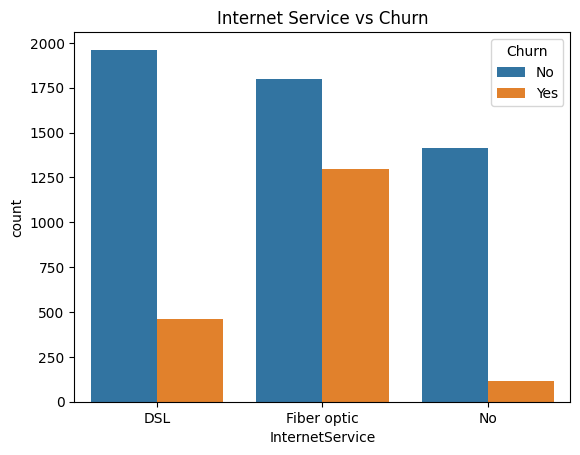

In [32]:
## Internet Service vs Churn
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")
plt.show()

* Fiber optic users churn more than DSL users.

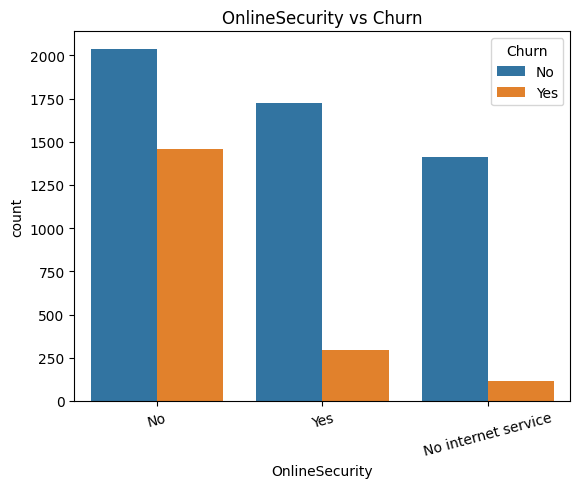

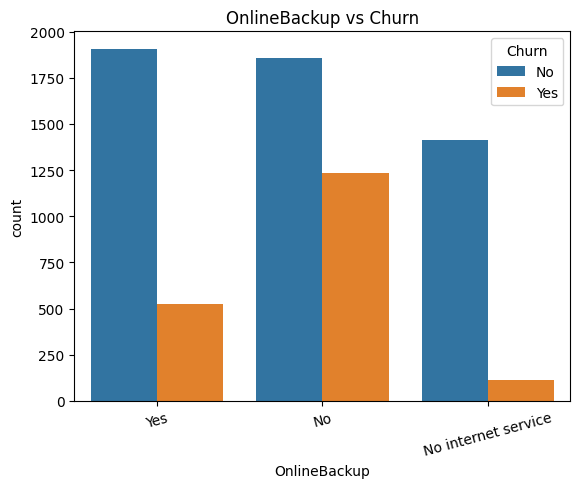

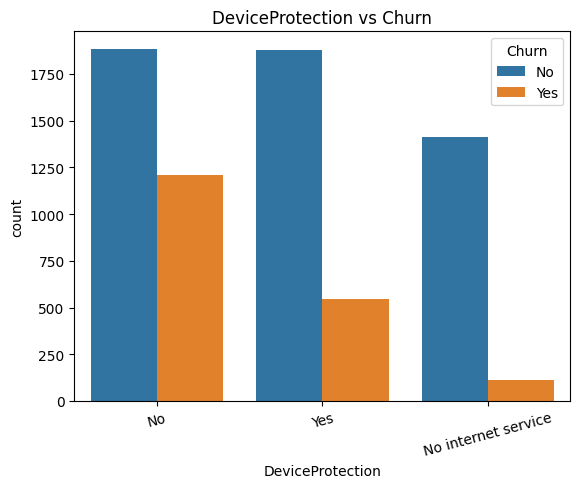

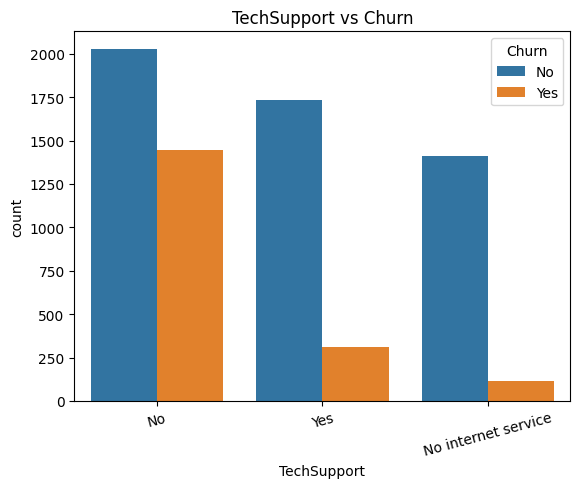

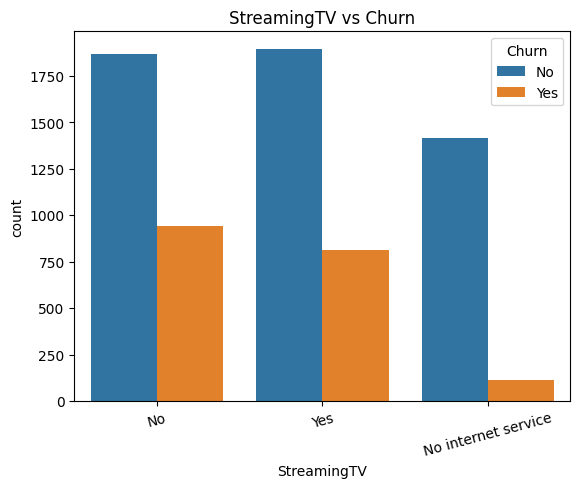

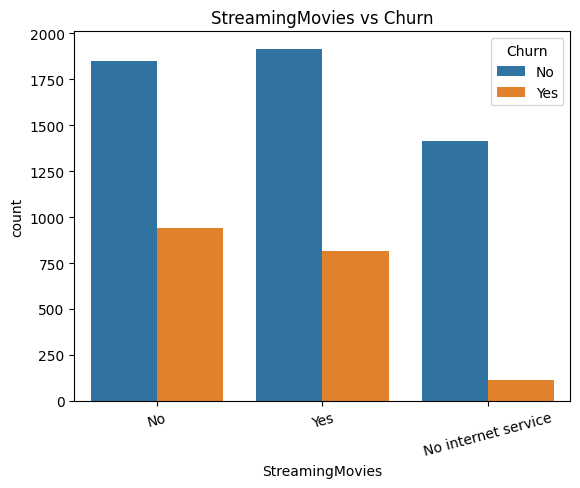

In [33]:
services = ['OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies']

for service in services:
    sns.countplot(x=service, hue='Churn', data=df)
    plt.title(f"{service} vs Churn")
    plt.xticks(rotation=15)
    plt.show()


### Customers without support services churn more.

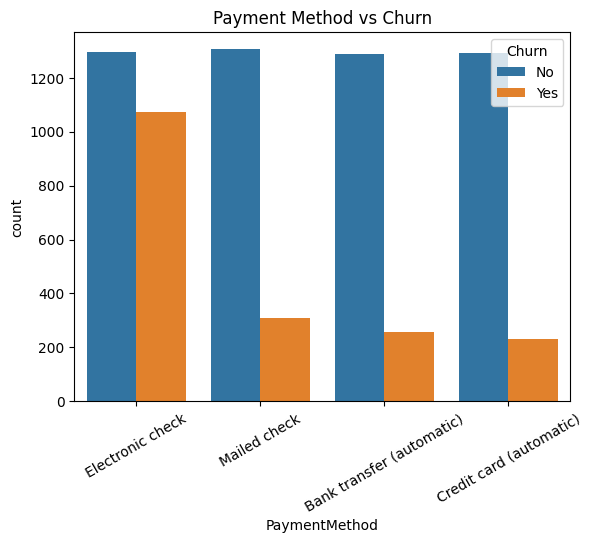

In [34]:
## Payment Method vs Churn

sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=30)
plt.show()

### Electronic check users show highest churn.

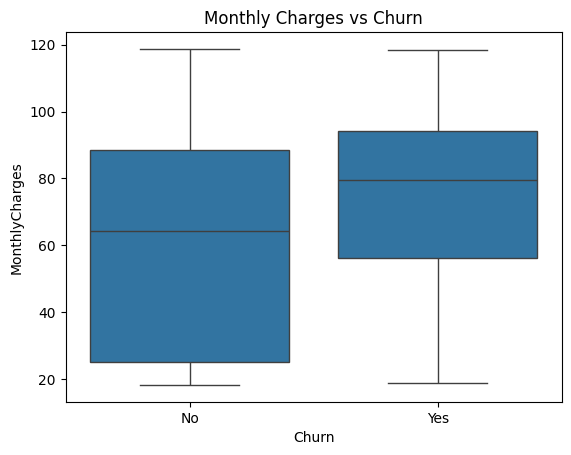

In [35]:
## Monthly Charges vs Churn

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

#### Higher monthly charges → higher churn probability.

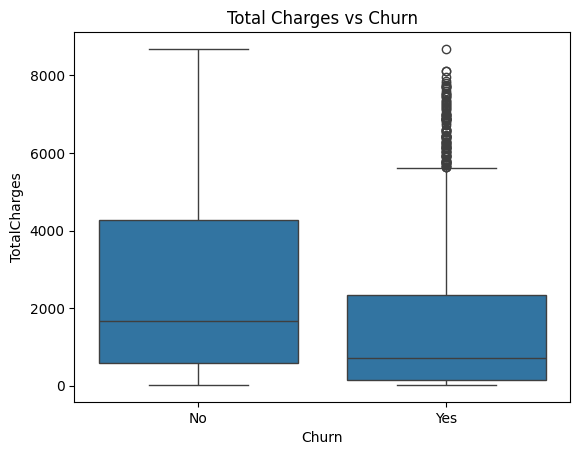

In [36]:
## Total Charges vs Churn

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()

### Customers who churn usually have lower total charges due to shorter tenure.

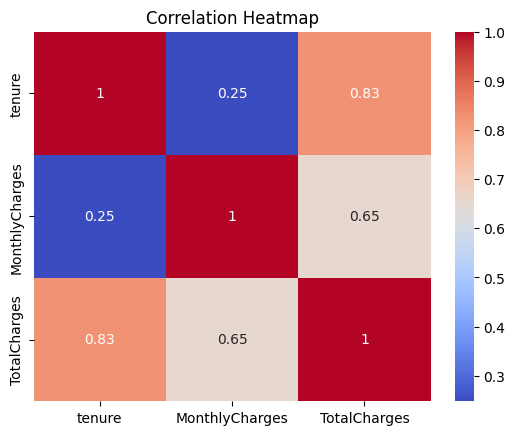

In [37]:
## Correlation Analysis (Numerical Features

corr = df[['tenure','MonthlyCharges','TotalCharges']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

* Tenure - TotalCharges: strong correlation

* MonthlyCharges independent of tenure

### insights -
*  Month-to-month contracts have the highest churn
*  New customers are more likely to churn
*  High monthly charges increase churn risk
*  Senior citizens churn more
*  Fiber optic and electronic check users churn more
*  Support services reduce churn

In [4]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [3]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64